In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

In [2]:
# Training Data Paths
burn = pd.read_csv("burntrain.csv")
burn.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
#a whole lot of data cleaning
del burn['Employee ID']

In [4]:
burn = burn.replace(np.nan, 0)
burn.head(5)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,0.0,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
burn['Date of Joining'] =  pd.to_datetime(burn["Date of Joining"])
burn.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,0.0,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [6]:
burn['Date of Joining'] = pd.DatetimeIndex(burn['Date of Joining']).month
burn.rename(columns = {'Date of Joining' : 'Month Joined'}, inplace = True)
burn.head(10)

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,Female,Service,No,2.0,3.0,3.8,0.16
1,11,Male,Service,Yes,1.0,2.0,5.0,0.36
2,3,Female,Product,Yes,2.0,0.0,5.8,0.49
3,11,Male,Service,Yes,1.0,1.0,2.6,0.20
4,7,Female,Service,No,3.0,7.0,6.9,0.52
5,11,Male,Product,Yes,2.0,4.0,3.6,0.29
6,1,Female,Service,No,3.0,6.0,7.9,0.62
7,10,Female,Service,Yes,2.0,4.0,4.4,0.33
8,12,Female,Service,No,3.0,6.0,0.0,0.56
9,3,Female,Product,No,3.0,6.0,0.0,0.67


In [7]:
burn_df_clean = {"Gender": {"Male": 0, "Female": 1},
                  "Company Type": {"Service" : 0, "Product" : 1},
                    "WFH Setup Available": {"No" : 0, "Yes": 1}}
burn_new_train = burn.replace(burn_df_clean)
burn_new_train.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,1,0,0,2.0,3.0,3.8,0.16
1,11,0,0,1,1.0,2.0,5.0,0.36
2,3,1,1,1,2.0,0.0,5.8,0.49
3,11,0,0,1,1.0,1.0,2.6,0.20
4,7,1,0,0,3.0,7.0,6.9,0.52


In [8]:
features = pd.get_dummies(burn_new_train)
features.head(5)

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9,1,0,0,2.0,3.0,3.8,0.16
1,11,0,0,1,1.0,2.0,5.0,0.36
2,3,1,1,1,2.0,0.0,5.8,0.49
3,11,0,0,1,1.0,1.0,2.6,0.20
4,7,1,0,0,3.0,7.0,6.9,0.52


In [9]:
features.rename(columns = {'Burn Rate' : 'Burn_Rate'}, inplace = True)

In [10]:
features['Burn_Rate'] = features['Burn_Rate'].round(decimals=1)
features.head()

,Month Joined,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn_Rate
0,9,1,0,0,2.0,3.0,3.8,0.2
1,11,0,0,1,1.0,2.0,5.0,0.4
2,3,1,1,1,2.0,0.0,5.8,0.5
3,11,0,0,1,1.0,1.0,2.6,0.2
4,7,1,0,0,3.0,7.0,6.9,0.5


Text(0.5, 0, 'Burn Rate - Highest to Lowest')

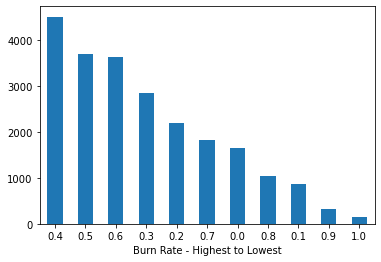

In [11]:
bar = features.Burn_Rate.value_counts().plot(kind="bar", rot=0)
bar.set_xlabel('Burn Rate - Highest to Lowest')

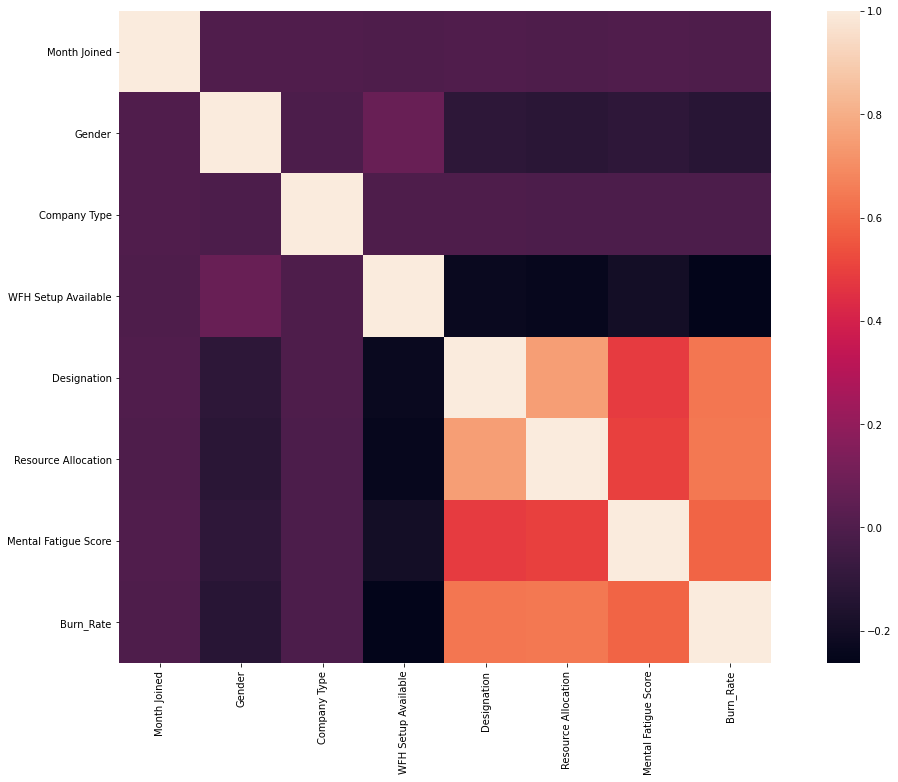

In [12]:
# A general correlations matrix
corr_mat = features.corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns_plot = sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);
sns_plot.figure.savefig("train_heat")

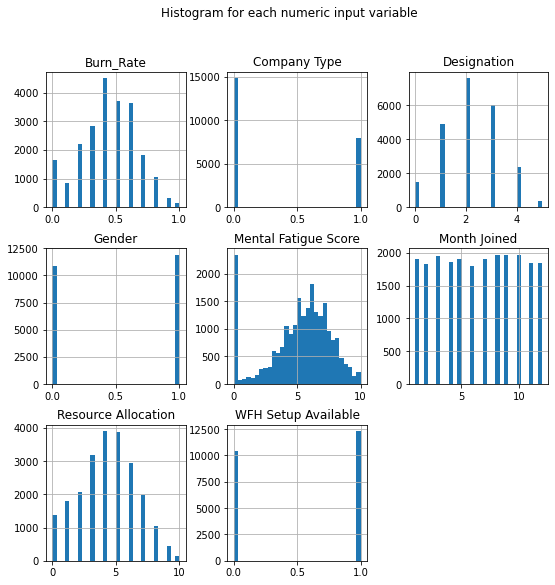

In [13]:
import pylab as pl
features.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('burn_hist')
plt.show()

In [14]:
features.columns = features.columns.str.replace(' ', '_')
features.head()

,Month_Joined,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,9,1,0,0,2.0,3.0,3.8,0.2
1,11,0,0,1,1.0,2.0,5.0,0.4
2,3,1,1,1,2.0,0.0,5.8,0.5
3,11,0,0,1,1.0,1.0,2.6,0.2
4,7,1,0,0,3.0,7.0,6.9,0.5


In [15]:
dataset = features.values
dataset

array([[ 9. ,  1. ,  0. , ...,  3. ,  3.8,  0.2],
       [11. ,  0. ,  0. , ...,  2. ,  5. ,  0.4],
       [ 3. ,  1. ,  1. , ...,  0. ,  5.8,  0.5],
       ...,
       [11. ,  0. ,  0. , ...,  7. ,  0. ,  0.7],
       [ 1. ,  1. ,  0. , ...,  5. ,  5.9,  0.5],
       [ 1. ,  0. ,  1. , ...,  6. ,  7.8,  0.6]])

In [16]:
x = dataset[:, 5:7]
y = dataset[:, 7]
y

array([0.2, 0.4, 0.5, ..., 0.7, 0.5, 0.6])

In [17]:
# # x = features.drop("Burn_Rate", axis=1)
# x = features[["Designation", "Resource_Allocation"]]
# y = features['Burn_Rate']
print(x.shape, y.shape)

(22750, 2) (22750,)


In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.3 , 0.38],
       [0.2 , 0.5 ],
       [0.  , 0.58],
       ...,
       [0.7 , 0.  ],
       [0.5 , 0.59],
       [0.6 , 0.78]])

In [19]:
# x_train = features[["Designation",  "Resource_Allocation"]].values
# y_train = features["Burn_Rate"].values
# x_test = features_test[["Designation",  "Resource Allocation"]].values
# y_test = features_test["Burn_Rate"].values
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)

In [20]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [21]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)


(15925, 2) (3412, 2) (3413, 2) (15925,) (3412,) (3413,)


In [24]:
# # Building and training the model
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(x_train, y_train)
 
# # Predicting the Test set results
# y_pred = classifier.predict(x_test)

In [25]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

In [26]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [27]:
x_train_scaled.shape

(15925, 2)

In [28]:
y_train_categorical.shape

(15925, 2)

In [29]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model = Sequential()
# number_inputs = 2
# number_hidden_nodes = 4
# number_classes = 2
# model.add(Dense(units=number_hidden_nodes,
#                 activation='relu', input_dim=number_inputs))
# model.add(Dense(units=number_classes, activation='softmax'))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train_scaled, y_train_categorical,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

In [ ]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# Fit (train) the model
model.fit(
    x_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

In [32]:
#round 2
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [33]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [34]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    x_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
498/498 - 1s - loss: 0.1992 - accuracy: 0.9714
Epoch 2/100
498/498 - 0s - loss: 0.0424 - accuracy: 0.9928
Epoch 3/100
498/498 - 0s - loss: 0.0338 - accuracy: 0.9928
Epoch 4/100
498/498 - 0s - loss: 0.0299 - accuracy: 0.9928
Epoch 5/100
498/498 - 0s - loss: 0.0278 - accuracy: 0.9928
Epoch 6/100
498/498 - 0s - loss: 0.0263 - accuracy: 0.9928
Epoch 7/100
498/498 - 0s - loss: 0.0253 - accuracy: 0.9928
Epoch 8/100
498/498 - 0s - loss: 0.0245 - accuracy: 0.9928
Epoch 9/100
498/498 - 0s - loss: 0.0245 - accuracy: 0.9928
Epoch 10/100
498/498 - 0s - loss: 0.0237 - accuracy: 0.9928
Epoch 11/100
498/498 - 0s - loss: 0.0235 - accuracy: 0.9927
Epoch 12/100
498/498 - 0s - loss: 0.0229 - accuracy: 0.9928
Epoch 13/100
498/498 - 0s - loss: 0.0227 - accuracy: 0.9928
Epoch 14/100
498/498 - 0s - loss: 0.0226 - accuracy: 0.9923
Epoch 15/100
498/498 - 0s - loss: 0.0223 - accuracy: 0.9927
Epoch 16/100
498/498 - 0s - loss: 0.0220 - accuracy: 0.9927
Epoch 17/100
498/498 - 0s - loss: 0.0217 - accura

In [ ]:
model_loss, model_accuracy = model.evaluate(
    x_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    x_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
###### the classification part ############
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
features["Burnout"] = 0
features["Burnout"].astype(str)
features.head()

In [ ]:
target = features["Burn_Rate"]
target_names = ["Good", "Burnt Out"]

In [ ]:
burned = features.drop("Burn_Rate", axis = 1)
names = burned.columns
burned.head()

In [ ]:
burned.dtypes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(burned, target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Building and training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)